<a href="https://colab.research.google.com/github/humanet1603/krx_using_api/blob/main/aimodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RMSE: 1.887545622800072, MAE: 1.5274476423429066


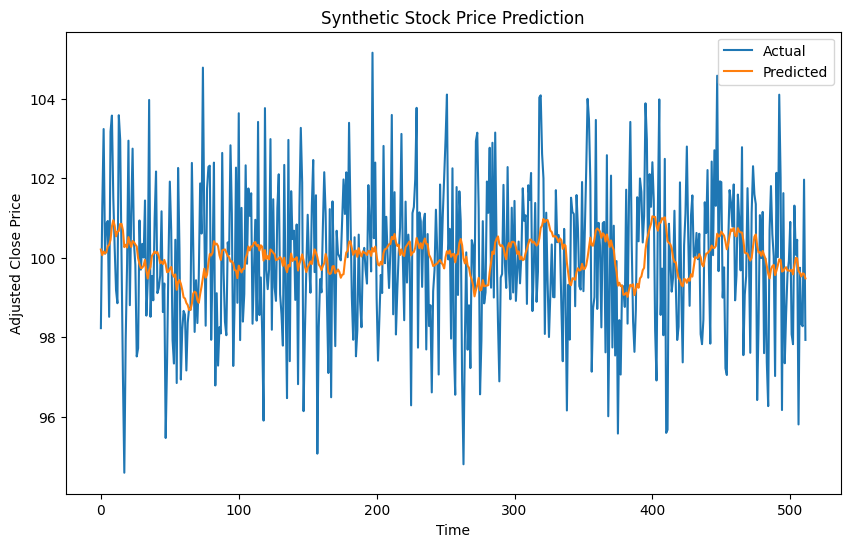

Prediction: [99.4775543]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import joblib

# Generate synthetic data
dates = pd.date_range(start='2010-01-01', end='2020-01-01', freq='B')  # Business days
np.random.seed(0)
prices = np.random.lognormal(mean=0.001, sigma=0.02, size=len(dates)) * 100
data = pd.DataFrame(data=prices, index=dates, columns=['Adj Close'])

# Ensure no missing values
data.dropna(inplace=True)

# Feature Engineering: Create moving averages
data['SMA_20'] = data['Adj Close'].rolling(window=20).mean()
data['SMA_50'] = data['Adj Close'].rolling(window=50).mean()

# Ensure no missing values after feature engineering
data.dropna(inplace=True)

# Prepare feature and target data
X = data[['SMA_20', 'SMA_50']]
y = data['Adj Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse}, MAE: {mae}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Synthetic Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.show()

# Save the model
joblib.dump(model, 'synthetic_model.pkl')

# Load the model
loaded_model = joblib.load('synthetic_model.pkl')

# Make a prediction with the loaded model
new_data = X_test.iloc[-1].values.reshape(1, -1)
prediction = loaded_model.predict(new_data)

print(f'Prediction: {prediction}')
